# Libraries import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import DF

In [2]:
df = pd.read_csv("/work/crime-data.csv")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning

In [3]:
df = df.drop(df[df['franja_horaria'] == 'S/D'].index)
df = df.dropna(subset = ['comuna'])
df['franja_horaria'] = df['franja_horaria'].astype(int)
df['comuna'] = df['comuna'].astype(int)
df['fecha'] = pd.to_datetime(df['fecha'])
df['mes'] = df['fecha'].dt.month
df['mes'] = df['mes'].astype(int)

# Crime count for commune

<BarContainer object of 15 artists>

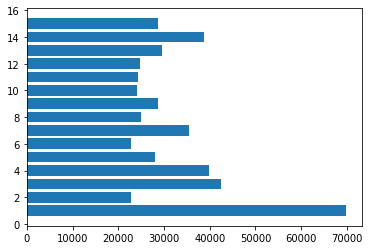

In [4]:
comunas = df['comuna'].unique()
comunas.sort()

a = []
for i in comunas:
    a.append(df[(df['comuna'] == i)].shape[0])

plt.barh(comunas, a) 

# Crime count for city

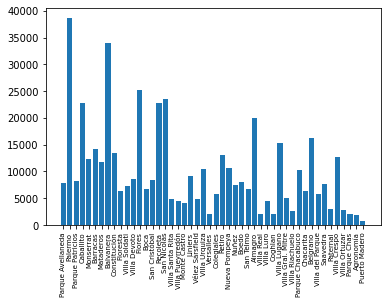

In [5]:
barrios = df['barrio'].unique()

a = []
for i in barrios:
    a.append(df[(df['barrio'] == i)].shape[0])

plt.bar(barrios, a)
plt.xticks(rotation=90,font={'size': 7})
plt.show()

# Crime count for month 

<BarContainer object of 12 artists>

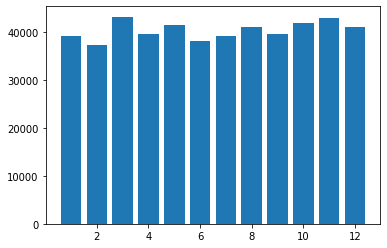

In [16]:
months = df['mes'].unique()

a = []
for i in months:
    a.append(df[(df['mes'] == i)].shape[0])

plt.bar(months, a)

# Crime count for time zone

<BarContainer object of 24 artists>

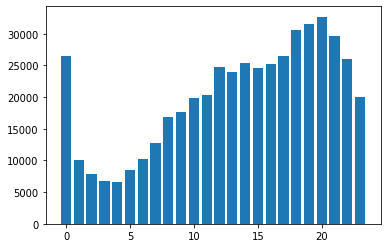

In [6]:
f_horaria = df['franja_horaria'].unique()
f_horaria.sort()

a = []
for i in f_horaria:
    a.append(df[df['franja_horaria'] == i].shape[0])

plt.bar(f_horaria, a)

# Crime-kind of crime - General

<BarContainer object of 4 artists>

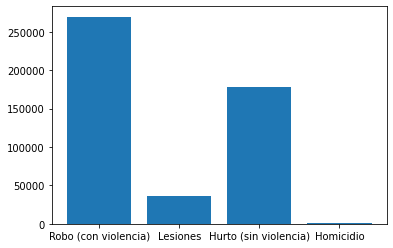

In [7]:
tipos = df['tipo_delito'].unique()

a = []
for i in tipos:
  a.append(df[df['tipo_delito'] == i].shape[0])

plt.bar(tipos, a) 

# Crime-kind of crime on a city

<BarContainer object of 4 artists>

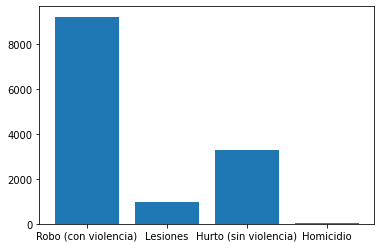

In [8]:
tipos = df['tipo_delito'].unique()

barrio = 'Constitución'

a = []
for i in tipos:
  a.append(df[(df['barrio'] == f'{barrio}') & (df['tipo_delito'] == i)].shape[0])

plt.bar(tipos, a) 

# Crime-kind of crime on a commune

<BarContainer object of 4 artists>

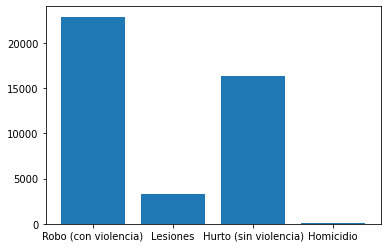

In [13]:
tipos = df['tipo_delito'].unique()

comuna = 3

a = []
for i in tipos:
    a.append(df[(df['comuna'] == comuna) & (df['tipo_delito'] == i)].shape[0])   

plt.bar(tipos, a)

# Percentage of crime-kind on each city

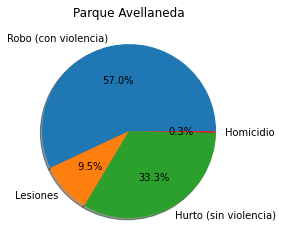

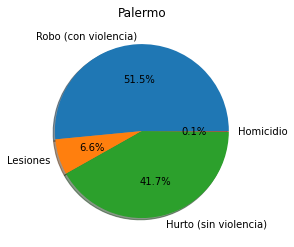

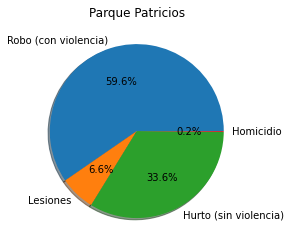

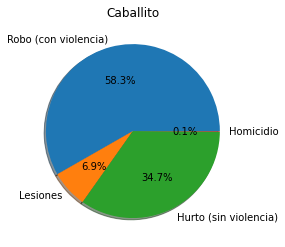

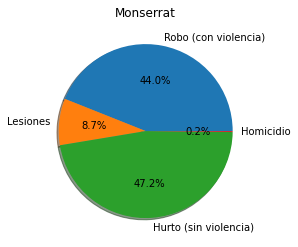

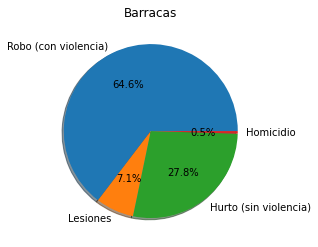

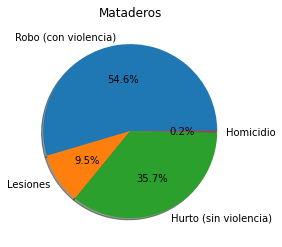

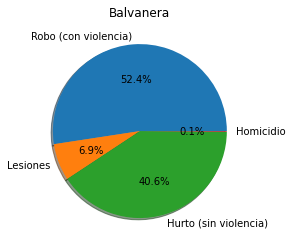

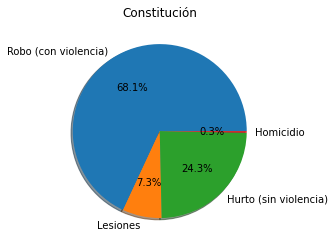

In [10]:
barrios = df['barrio'].unique()
tipos = df['tipo_delito'].unique()

for i in barrios:
    
    y = []
    for j in tipos:    
        y.append(df[(df['barrio'] == i) & (df['tipo_delito'] == j)].shape[0])
    
    plt.pie(y,labels = tipos, autopct='%1.1f%%', shadow=True)
    plt.title(i)
    plt.show()

# Heat-Grid of crime on a city  

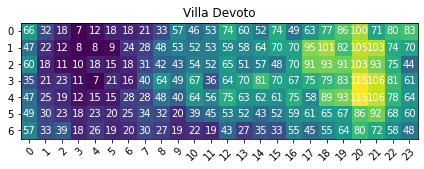

In [15]:
data = df['franja_horaria'].unique()
data.sort()
horarios = [i for i in data]

fecha = df['fecha']
df['dia_semana'] = fecha.dt.weekday
t = df['dia_semana'].unique()
t.sort()
weekdays = [i for i in t]

barrio = 'Villa Devoto'

h = []
for i in weekdays:
    z = []
    for j in horarios:
        z.append(df[(df['dia_semana'] == i) & (df['franja_horaria'] == j) & (df['barrio'] == barrio)].shape[0])
    h.append(z)
        
j = np.array(h)

fig, ax = plt.subplots()
im = ax.imshow(j)
ax.set_yticks(np.arange(len(weekdays)))
ax.set_xticks(np.arange(len(horarios)))
ax.set_yticklabels(weekdays)
ax.set_xticklabels(horarios)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for x in range(len(weekdays)):
    for z in range(len(horarios)):
        text = ax.text(z, x, j[x, z], ha="center", va="center", color="w")

ax.set_title(barrio)
fig.tight_layout()
plt.show()

# Percentage of crime-kind in each combination weekday-hour

In [12]:
barrios = df['barrio'].unique()
tipos = df['tipo_delito'].unique()

barrio = 'Villa Devoto'

for i in weekdays:
    for j in horarios:
        
        y = []
        for tipo in tipos:    
            y.append(df[
                (df['barrio'] == barrio) & 
                (df['tipo_delito'] == tipo) & 
                (df['dia_semana'] == i) & 
                (df['franja_horaria'] == j)
                ].shape[0])

        plt.pie(y,labels=tipos,autopct='%1.1f%%', textprops={'color': 'white', 'size': 'large'})
        plt.title(f'Day: {i} - Hour: {j}')
        plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f8150a6-1fc0-4880-bf77-6ce060551ead' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>